Importing Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

importing File Location

In [66]:
file_path= r'c:\Users\Bharath Marupatla\OneDrive\Documents\analyst\ml\KNN project\music_data.csv'
music_data = pd.read_csv(file_path)

Data Exploration

In [67]:
music_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [68]:
music_data.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [69]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


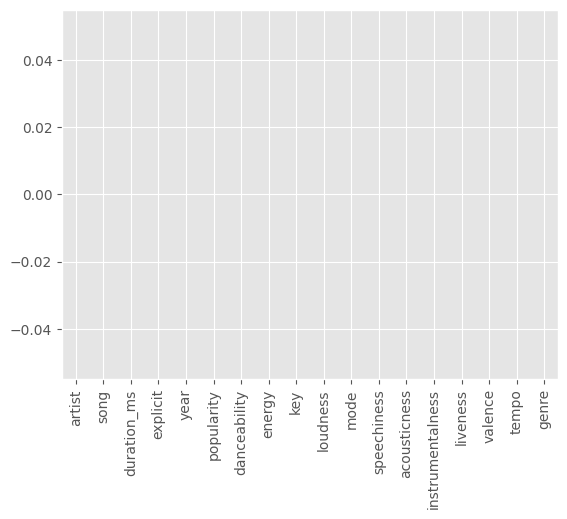

In [70]:
music_data.isnull().sum().plot.bar()
plt.show()

In [71]:
music_data.select_dtypes(np.number)

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,167066,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,250546,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,224493,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,200560,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,178426,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,200593,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,171029,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998


In [72]:
music_data["explicit"] = music_data["explicit"].astype(int)

In [73]:
music_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [74]:
music_features=music_data.select_dtypes(np.number)
corr_matrix = music_features.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.123595,-0.316534,0.050617,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603
explicit,0.123595,1.000000,0.078477,0.046605,0.248845,-0.162462,0.003320,-0.089829,0.049576,0.417343,-0.033523,-0.082522,0.008884,-0.045455,0.013221
year,-0.316534,0.078477,1.000000,-0.003825,0.033532,-0.108644,0.007380,0.017479,-0.007358,0.001111,0.033809,-0.050265,-0.027037,-0.209365,0.076867
popularity,0.050617,0.046605,-0.003825,1.000000,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288
danceability,-0.060057,0.248845,0.033532,-0.003546,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418
energy,-0.078763,-0.162462,-0.108644,-0.014021,-0.104038,1.000000,-0.003446,0.651016,-0.040651,-0.057018,-0.445469,0.037861,0.156761,0.334474,0.153719
key,-0.002560,0.003320,0.007380,0.014823,0.032731,-0.003446,1.000000,-0.007474,-0.153182,0.007147,0.002365,-0.008173,-0.033071,0.036977,-0.001431
loudness,-0.079912,-0.089829,0.017479,0.030632,-0.033315,0.651016,-0.007474,1.000000,-0.028133,-0.076388,-0.310039,-0.104925,0.102159,0.232150,0.080709
mode,-0.003848,0.049576,-0.007358,-0.021353,-0.067528,-0.040651,-0.153182,-0.028133,1.000000,-0.000077,0.005744,-0.038613,0.025439,-0.074681,0.048434
speechiness,0.066998,0.417343,0.001111,0.021162,0.145590,-0.057018,0.007147,-0.076388,-0.000077,1.000000,0.000394,-0.062954,0.061172,0.073605,0.057747


In [75]:
from sklearn.preprocessing import StandardScaler
import plotly.express as px

100%|██████████| 13/13 [00:09<00:00,  1.34it/s]


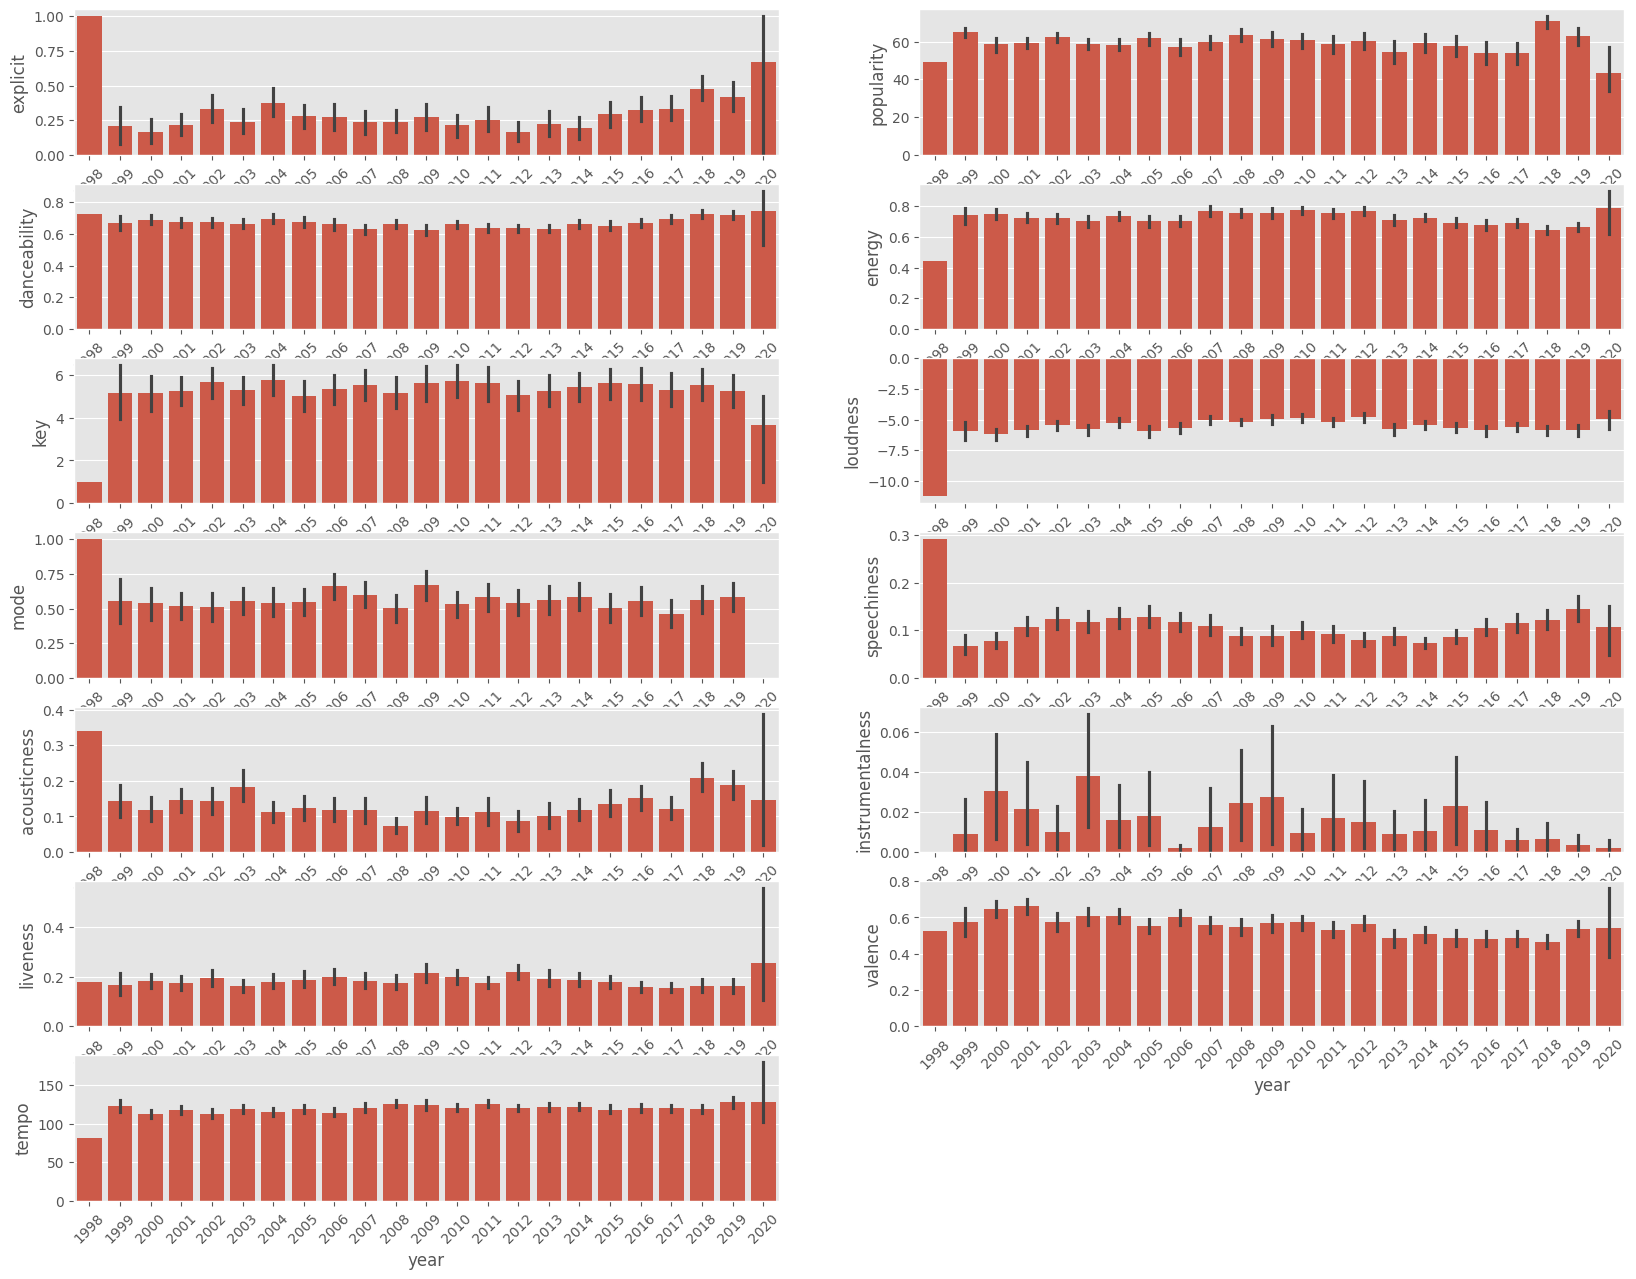

In [76]:
visual_data = music_data.drop(columns=['song', 'artist', 'year', 'genre'])

plt.figure(figsize=(20, 20))
for i in tqdm(np.arange(1, len(visual_data.columns))):
    plt.subplot(9, 2, i)
    sb.barplot(x=music_data.year,y=visual_data[visual_data.columns[i]])
    plt.xticks(rotation=45);
plt.show()

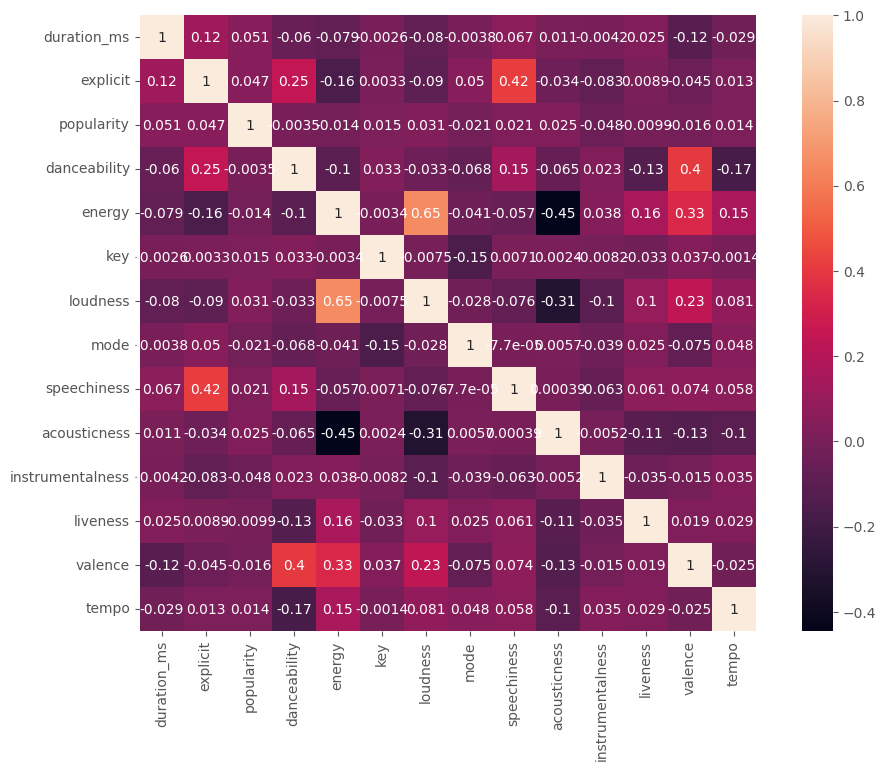

In [77]:
plt.subplots(figsize=(12, 8))
sb.heatmap(visual_data.corr(), annot=True, square=True)
plt.show()

One Hot Encoding of Genre

In [78]:
from sklearn.preprocessing import OneHotEncoder
unique_genres = set()
for genre_list in music_data["genre"]:
    genres = genre_list.split(",")
    for genre in genres:
        unique_genres.add(genre)

# Create a one-hot encoding for the genre column
encoder = OneHotEncoder()
encoder.fit([[genre] for genre in unique_genres])
# Encode the genre data
encoded_genres = []
for genres in music_data["genre"]:
    genres = genres.split(",")
    one_hot = [0 if genre not in genres else 1 for genre in unique_genres]
    encoded_genres.append(one_hot)

In [79]:
import os
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

Function for Normalizing Column

In [80]:
def normalize_column(col):
    max_d = music_data[col].max()
    min_d = music_data[col].min()
    music_data[col] = (music_data[col] - min_d)/(max_d - min_d)

Selecting Data Types which are used in Training and Testing

In [81]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = music_data.select_dtypes(include=num_types)
        
for col in num.columns:
    if col != 'year':
        normalize_column(col)

<Axes: >

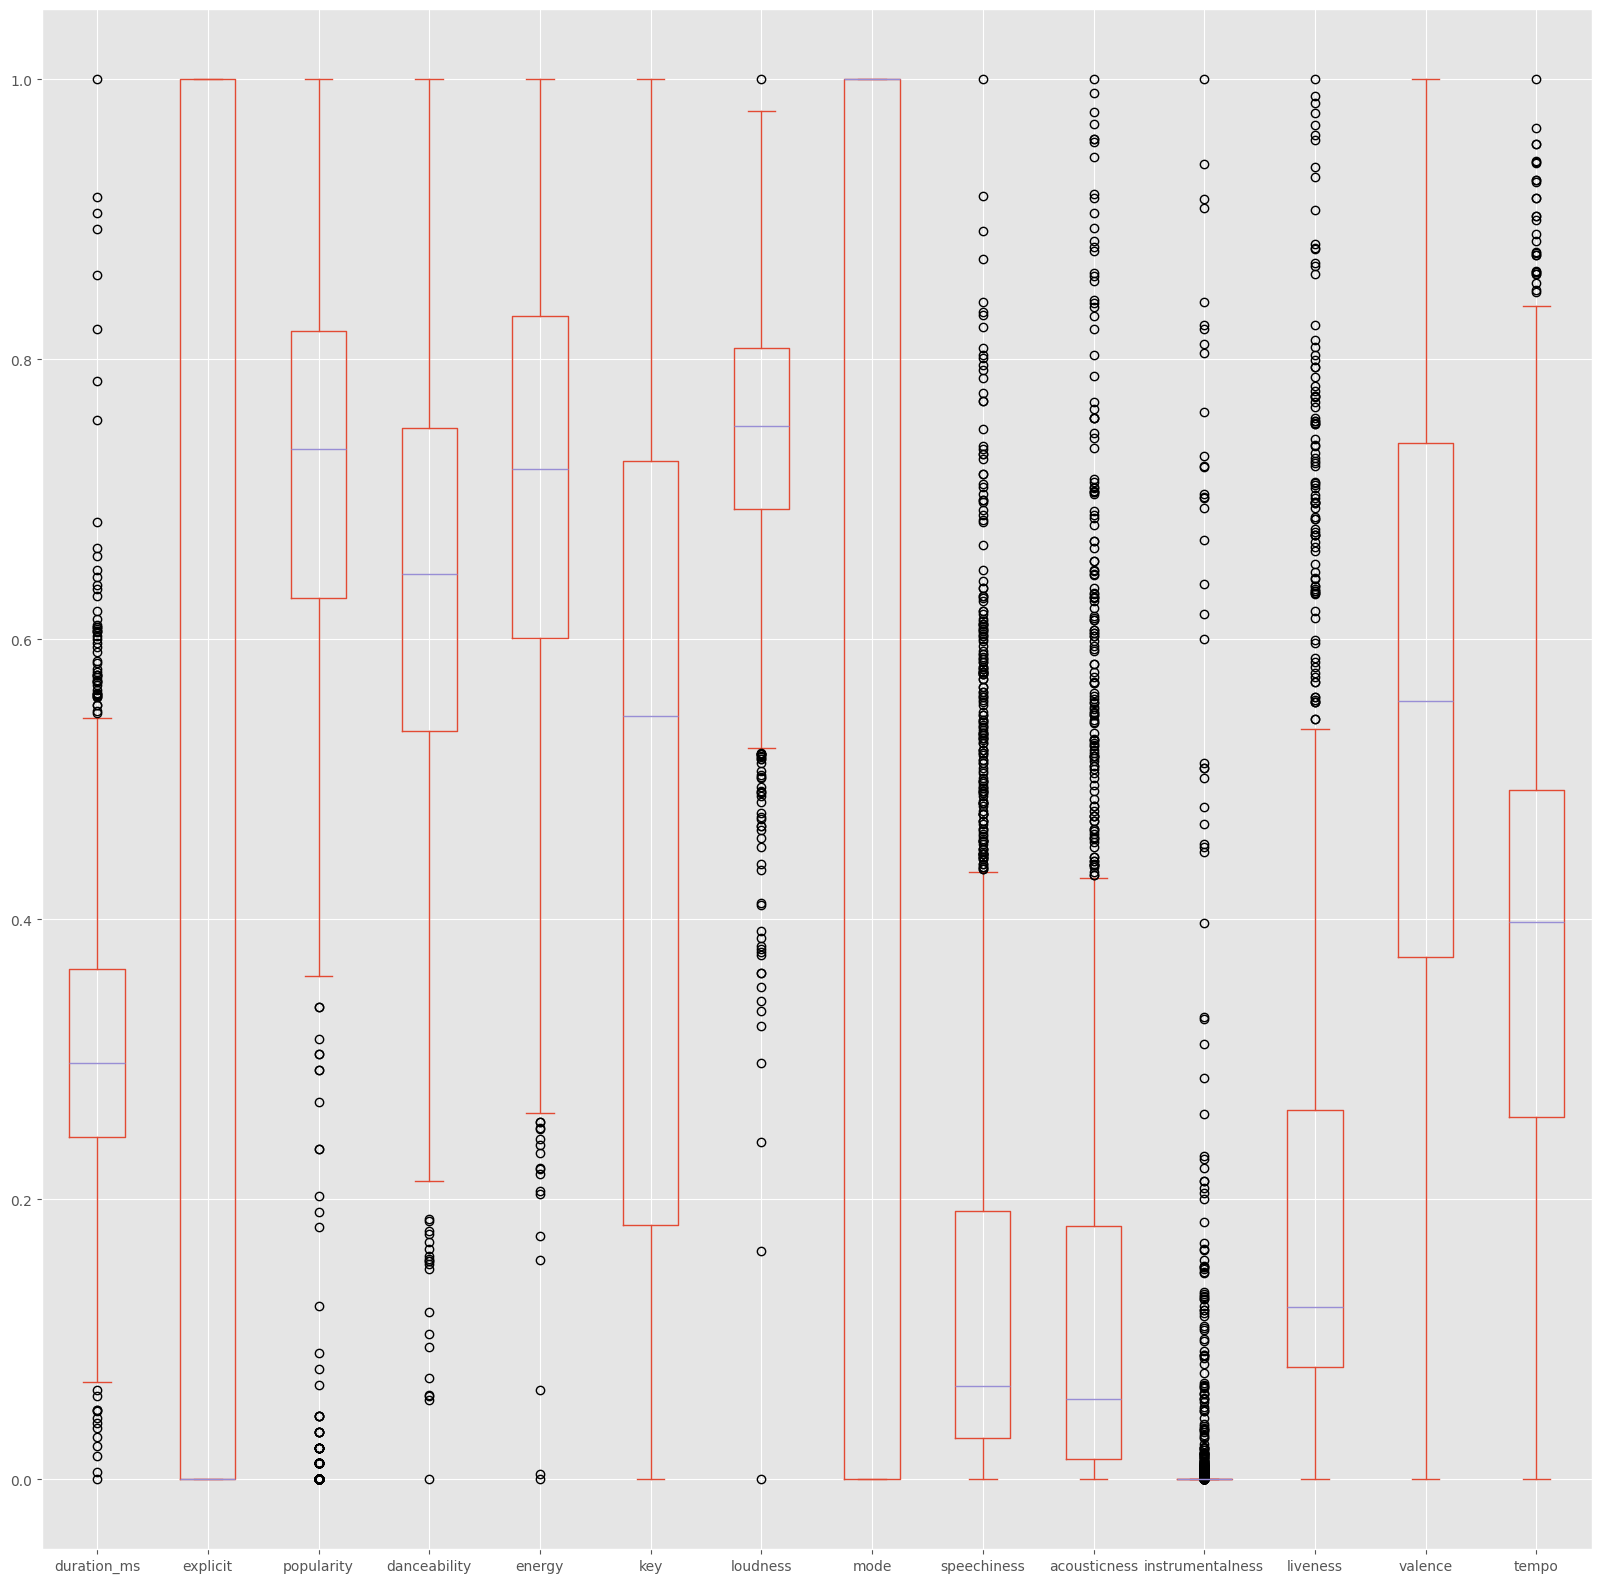

In [82]:
music_data.select_dtypes(np.number).drop(columns = ['year']).plot(kind='box' ,figsize=(20, 20) ,fontsize=10)

Scatterplot visualization to see patterns of interest

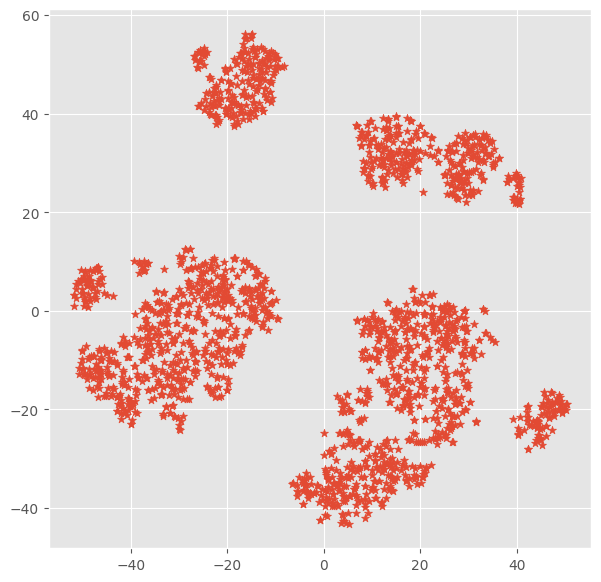

In [83]:
model = TSNE(n_components = 2, random_state = 0)
music_data_modified = music_data.select_dtypes(np.number).drop(columns=['year'])
tsne_data = model.fit_transform(music_data_modified)
plt.style.use('ggplot')
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1],  marker= '*')
plt.show()

JOINING THE ENCODED GENRE COLUMNS WITH THE ORIGINAL DATASET

In [84]:
encoded_genres_df = pd.DataFrame(encoded_genres, columns=list(unique_genres))

# Concatenate the encoded genres DataFrame with the original dataset
music_data = pd.concat([music_data, encoded_genres_df], axis=1)

# View the dataset with the encoded genres
music_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,R&B,easy listening,classical,rock,blues,pop,hip hop,latin,country,Dance/Electronic
0,Britney Spears,Oops!...I Did It Again,0.264478,0.0,2000,0.865169,0.735225,0.825230,0.090909,0.744639,...,0,0,0,0,0,0,0,0,0,0
1,blink-182,All The Small Things,0.145673,0.0,1999,0.887640,0.360520,0.891961,0.000000,0.770630,...,0,0,0,0,0,1,0,0,0,0
2,Faith Hill,Breathe,0.370598,0.0,1999,0.741573,0.472813,0.467217,0.636364,0.568584,...,0,0,0,0,0,0,0,0,1,0
3,Bon Jovi,It's My Life,0.300402,0.0,2000,0.876404,0.498818,0.908908,0.000000,0.812877,...,0,0,0,0,0,0,0,0,0,0
4,*NSYNC,Bye Bye Bye,0.235918,0.0,2000,0.730337,0.573286,0.924796,0.727273,0.776164,...,0,0,0,0,0,0,0,0,0,0


importing the KMeans clustering algorithm that is used to generate categories from music relations

In [85]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
cat = km.fit_predict(num)
music_data['cat'] = cat
normalize_column('cat')

In [86]:
music_data.cat[:10]

0    0.111111
1    0.333333
2    0.222222
3    0.111111
4    0.666667
5    0.222222
6    0.000000
7    0.222222
8    0.777778
9    0.000000
Name: cat, dtype: float64

Visualizing the Clusters with t-SNE

In [87]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = music_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
music_data['cluster'] = cluster_pipeline.predict(X)

In [88]:
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = music_data['genre']
projection['cluster'] = music_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.003s...
[t-SNE] Computed neighbors for 2000 samples in 0.057s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 1.694863
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.893448
[t-SNE] KL divergence after 1000 iterations: 1.116235


In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = music_data.select_dtypes(np.number).drop(columns = ['cat','cluster','year']).copy()
y = music_data['cluster']

Splitting the data into train, test and validation sets

In [90]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(1600, 39)
(1600,)
(200, 39)
(200,)
(200, 39)
(200,)


(None, None)

using various values of K we shall train our model

In [91]:
knn1= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=1)
knn5= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=5)
knn10= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=10)

fitted with both the training and validation data then training data again to learn different patterns and prevent bias

In [92]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn10.fit(X_train, y_train)

knn5.fit(X_valid, y_valid)
knn1.fit(X_valid, y_valid)
knn10.fit(X_valid, y_valid)

knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn10.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_valid)
y_pred_1 = knn1.predict(X_valid)
y_pred_10 = knn1.predict(X_valid)

accuracy score

In [93]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_valid, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_valid, y_pred_1)*100)
print("Accuracy with k=10", accuracy_score(y_valid, y_pred_10)*100)

Accuracy with k=5 94.0
Accuracy with k=1 95.0
Accuracy with k=10 95.0


Using HyperParameter Tuning

In [94]:
'''import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection
selector = SelectKBest(score_func=f_classif, k='all')  # Try reducing features for better accuracy
X_selected = selector.fit_transform(X_scaled, y)

# Split Data
X_train, X_rem, y_train, y_rem = train_test_split(X_selected, y, train_size=0.8, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=0)

# Hyperparameter Grid for KNN
param_grid = {
    'n_neighbors': range(1, 31),  # Extend range of k
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Initialize KNN Classifier
knn = KNeighborsClassifier()

# Grid Search with Cross-Validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters and Model
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_knn = grid_search.best_estimator_

# Validation Accuracy
y_valid_pred = best_knn.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print("\nValidation Accuracy:", valid_accuracy * 100)

# Classification Report and Confusion Matrix
print("\nClassification Report:\n", classification_report(y_valid, y_valid_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_valid, y_valid_pred))

# Test Accuracy
y_test_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy * 100)'''



'import numpy as np\nfrom sklearn.model_selection import GridSearchCV, train_test_split\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.feature_selection import SelectKBest, f_classif\n\n# Feature Scaling\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n\n# Feature Selection\nselector = SelectKBest(score_func=f_classif, k=\'all\')  # Try reducing features for better accuracy\nX_selected = selector.fit_transform(X_scaled, y)\n\n# Split Data\nX_train, X_rem, y_train, y_rem = train_test_split(X_selected, y, train_size=0.8, random_state=0)\nX_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=0)\n\n# Hyperparameter Grid for KNN\nparam_grid = {\n    \'n_neighbors\': range(1, 31),  # Extend range of k\n    \'weights\': [\'uniform\', \'distance\'],\n    \'metric\': [\'euclidean\', \'manh

confusion matrix

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid, y_pred_1))
print(confusion_matrix(y_valid, y_pred_5))
print(confusion_matrix(y_valid, y_pred_10))

[[ 4  0  0  0  0  0  0  0  0]
 [ 0 17  0  4  0  3  0  0  0]
 [ 0  0 26  0  0  0  0  0  0]
 [ 0  2  1 23  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0 63  0  0]
 [ 0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0 15]]
[[ 4  0  0  0  0  0  0  0  0]
 [ 0 14  0  5  0  5  0  0  0]
 [ 0  0 26  0  0  0  0  0  0]
 [ 0  2  0 24  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0 63  0  0]
 [ 0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0 15]]
[[ 4  0  0  0  0  0  0  0  0]
 [ 0 17  0  4  0  3  0  0  0]
 [ 0  0 26  0  0  0  0  0  0]
 [ 0  2  1 23  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0 63  0  0]
 [ 0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0 15]]


Classification Report

In [96]:
print(classification_report(y_valid, y_pred_1))
print(classification_report(y_valid, y_pred_5))
print(classification_report(y_valid, y_pred_10))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.89      0.71      0.79        24
           2       0.96      1.00      0.98        26
           3       0.85      0.88      0.87        26
           4       1.00      1.00      1.00         6
           5       0.92      1.00      0.96        33
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00        15

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.95      0.95      0.95       200

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.88      0.58      0.70        24
           2       1.00      1.00      1.00        26
           3       0.83      0.92      0.87        26
           4       1.00 

Visualizing the prediction

In [97]:
tsne_model = TSNE(n_components = 2, random_state = 0)
tsne_data_X_valid = tsne_model.fit_transform(X_test)

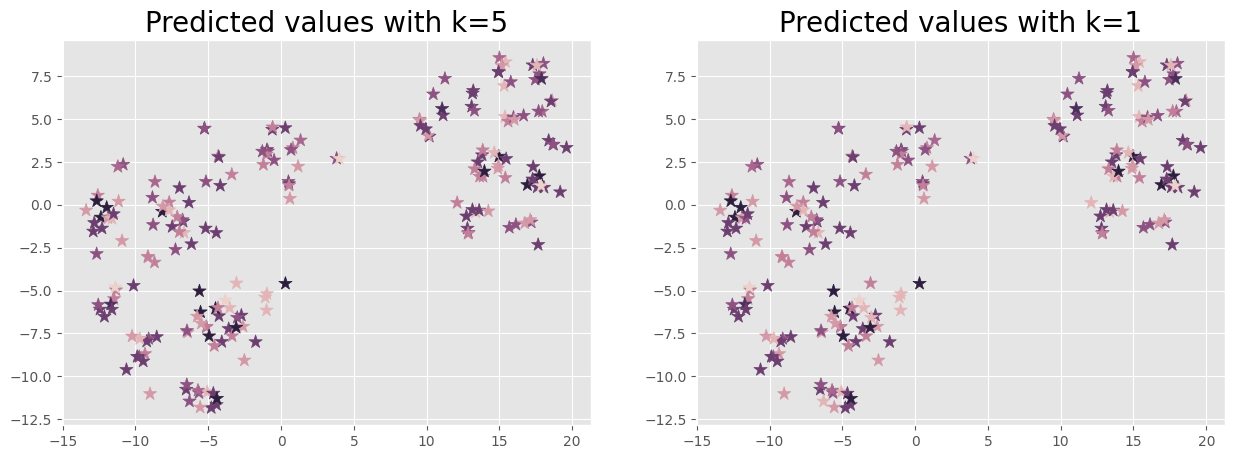

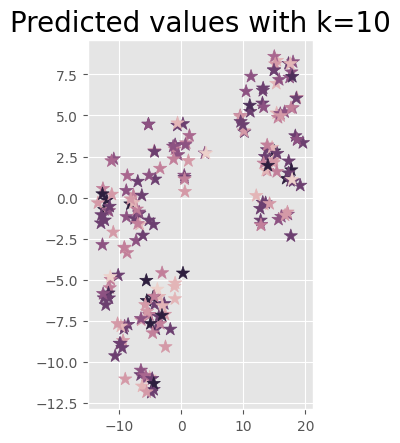

In [98]:
cmap = sb.cubehelix_palette(as_cmap=True)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_5, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=5", fontsize=20)
plt.subplot(1,2,2)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_1, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=1", fontsize=20)
plt.show()
plt.subplot(1,2,2)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_10, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=10", fontsize=20)
plt.show()

Creating a recommendation machine

In [99]:
from fuzzywuzzy import process
X_test

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,R&B,easy listening,classical,rock,blues,pop,hip hop,latin,country,Dance/Electronic
1761,0.232900,0.0,0.000000,0.860520,0.789217,0.181818,0.814260,1.0,0.063495,0.390357,...,0,0,0,0,0,0,0,0,0,0
1786,0.293793,0.0,0.539326,0.639480,0.829467,0.000000,0.814458,1.0,0.023517,0.061969,...,0,0,0,0,0,0,0,0,0,0
789,0.343512,0.0,0.764045,0.387707,0.703421,0.363636,0.819893,0.0,0.016462,0.195681,...,0,0,0,0,0,0,0,0,0,0
731,0.384501,0.0,0.674157,0.932624,0.849592,0.272727,0.764997,0.0,0.070731,0.170066,...,0,0,0,0,0,1,1,0,0,0
1386,0.277554,0.0,0.887640,0.559102,0.919500,0.454545,0.827700,1.0,0.037627,0.010022,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.356911,0.0,0.775281,0.903073,0.813579,0.454545,0.830418,0.0,0.178726,0.073138,...,0,0,0,0,0,0,0,0,0,0
402,0.231176,0.0,0.910112,0.762411,0.829467,0.454545,0.820239,0.0,0.164255,0.025493,...,0,0,0,0,0,0,0,0,0,0
1698,0.192690,0.0,0.887640,0.490544,0.526533,0.818182,0.645518,1.0,0.137301,0.686469,...,0,0,0,0,0,1,1,0,0,0
1820,0.439576,1.0,0.842697,0.919622,0.612329,0.181818,0.759413,1.0,0.290883,0.089736,...,0,0,0,0,0,1,1,0,0,0


In [103]:
recommendation_set = music_data.merge(X_test, how = 'inner' ,indicator=False)
recommendation_set

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,classical,rock,blues,pop,hip hop,latin,country,Dance/Electronic,cat,cluster
0,Eminem,The Real Slim Shady,0.461274,1.0,2000,0.966292,0.969267,0.641987,0.454545,0.803933,...,0,0,0,0,1,0,0,0,0.000000,3
1,Melanie C,Never Be The Same Again,0.488218,0.0,1999,0.685393,0.661939,0.667408,0.272727,0.759018,...,0,0,0,0,0,0,0,0,0.000000,2
2,Gigi D'Agostino,The Riddle,0.464577,0.0,1999,0.719101,0.722222,0.869717,0.545455,0.674177,...,0,0,0,0,0,0,0,0,0.000000,6
3,Linkin Park,In the End,0.279890,0.0,2000,0.932584,0.504728,0.857007,0.272727,0.723589,...,0,0,0,0,0,0,0,0,0.111111,8
4,Da Brat,What'chu Like (feat. Tyrese),0.291422,1.0,2000,0.595506,0.886525,0.663171,0.909091,0.571351,...,0,0,0,1,1,0,0,0,0.111111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Saweetie,My Type,0.036228,1.0,2019,0.797753,0.910165,0.800869,0.181818,0.702639,...,0,0,0,1,1,0,0,0,0.888889,1
211,Lil Tecca,Ransom,0.049145,1.0,2019,0.876404,0.728132,0.621862,0.636364,0.704467,...,0,0,0,0,1,0,0,0,0.888889,3
212,Flipp Dinero,Leave Me Alone,0.222654,1.0,2019,0.775281,0.783688,0.728842,0.636364,0.874988,...,0,0,0,1,1,0,0,0,0.666667,3
213,Calvin Harris,Giant (with Rag'n'Bone Man),0.313041,0.0,2019,0.820225,0.801418,0.881368,0.090909,0.800623,...,0,0,0,1,1,0,0,0,0.555556,5


In [104]:
def recommender(song_name, data,model):
    idx=process.extractOne(song_name, recommendation_set['song'])[2]
    print('Song Selected:-',recommendation_set['song'][idx], 'Index: ',idx)
    print('Searching for recommendations.....')
    requiredSongs = recommendation_set.select_dtypes(np.number).drop(columns = ['cat','cluster','year']).copy()
    distances, indices = model.kneighbors(requiredSongs.iloc[idx].values.reshape(1,-1))
    for i in indices:
        print(music_data['song'][i] + "      " + music_data['artist'][i])

In [105]:
def get_song_info(row_number):
    song_info = recommendation_set.loc[row_number, ["song", "artist"]]
    return song_info

song_info = get_song_info(2)
print("Song name: ", song_info["song"])
print("Artist name: ", song_info["artist"])

Song name:  The Riddle
Artist name:  Gigi D'Agostino


In [106]:
song_name = song_info["song"]
recommender(song_name,X_test, knn5)

Song Selected:- The Riddle Index:  2
Searching for recommendations.....
575               Scars      Papa Roach
286     U Don't Have to Call      Usher
168     There You'll Be      Faith Hill
1185          F**kin' Perfect      P!nk
1330    Come & Get It      Selena Gomez
dtype: object


Using lime to visualize predictions

<Figure size 1200x800 with 0 Axes>

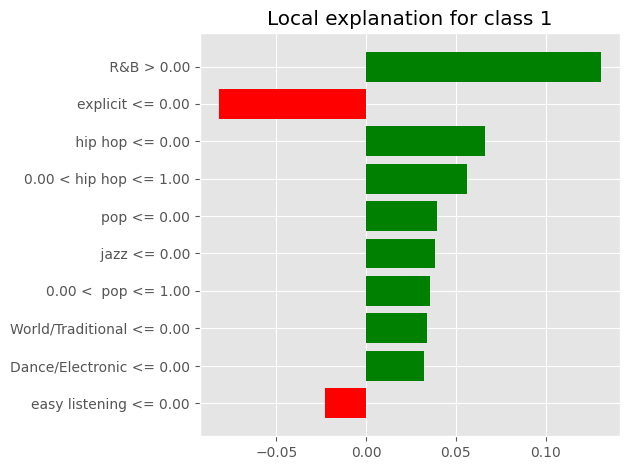

In [107]:
import lime
import lime.lime_tabular

# Create an instance of the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=knn5.classes_, discretize_continuous=True)

# Calculate the LIME explanation for a sample from the test data
exp = explainer.explain_instance(X_valid.iloc[0,:].values, knn5.predict_proba, num_features=10)

# Access the LIME explanation values
lime_values = exp.local_exp[1]

fig = plt.figure(figsize=(12, 8))
exp.as_pyplot_figure()
plt.tight_layout()